In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [57]:
df = pd.read_csv('/Users/giselles/Desktop/lab-customer-analysis-round-2/cleaned_marketing_customer')
df

,Unnamed: 0,id,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [58]:
df.columns = df.columns.map(lambda x: x.replace(' ', '_'))
df

,Unnamed:_0,id,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [59]:
df.columns

Index(['Unnamed:_0', 'id', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employment_status', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type', 'month'],
      dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed:_0                     10910 non-null  int64  
 1   id                             10910 non-null  int64  
 2   customer                       10910 non-null  object 
 3   state                          10910 non-null  object 
 4   customer_lifetime_value        10910 non-null  float64
 5   response                       10910 non-null  object 
 6   coverage                       10910 non-null  object 
 7   education                      10910 non-null  object 
 8   effective_to_date              10910 non-null  object 
 9   employment_status              10910 non-null  object 
 10  gender                         10910 non-null  object 
 11  income                         10910 non-null  int64  
 12  location_code                  10910 non-null 

In [61]:
df.describe()

,Unnamed:_0,id,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330,1.466728
std,3149.590053,3149.590053,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556,0.498915
min,0.000000,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,2727.250000,2727.250000,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5454.500000,5454.500000,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8181.750000,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.384256,4.000000,547.200000,2.000000
max,10909.000000,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [62]:
#Show a plot of the total number of responses
df.response.value_counts()

response
No     9444
Yes    1466
Name: count, dtype: int64

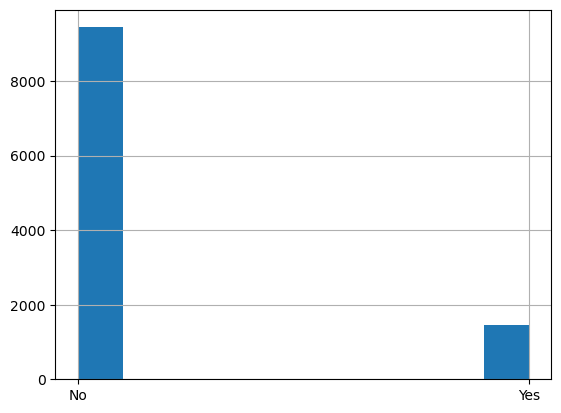

In [63]:
df.response.hist()
plt.show()

In [64]:
#Show a plot of the response rate by the sales channel

In [74]:
df.sales_channel.unique()

array(['Agent', 'Call Center', 'Branch', 'Web'], dtype=object)

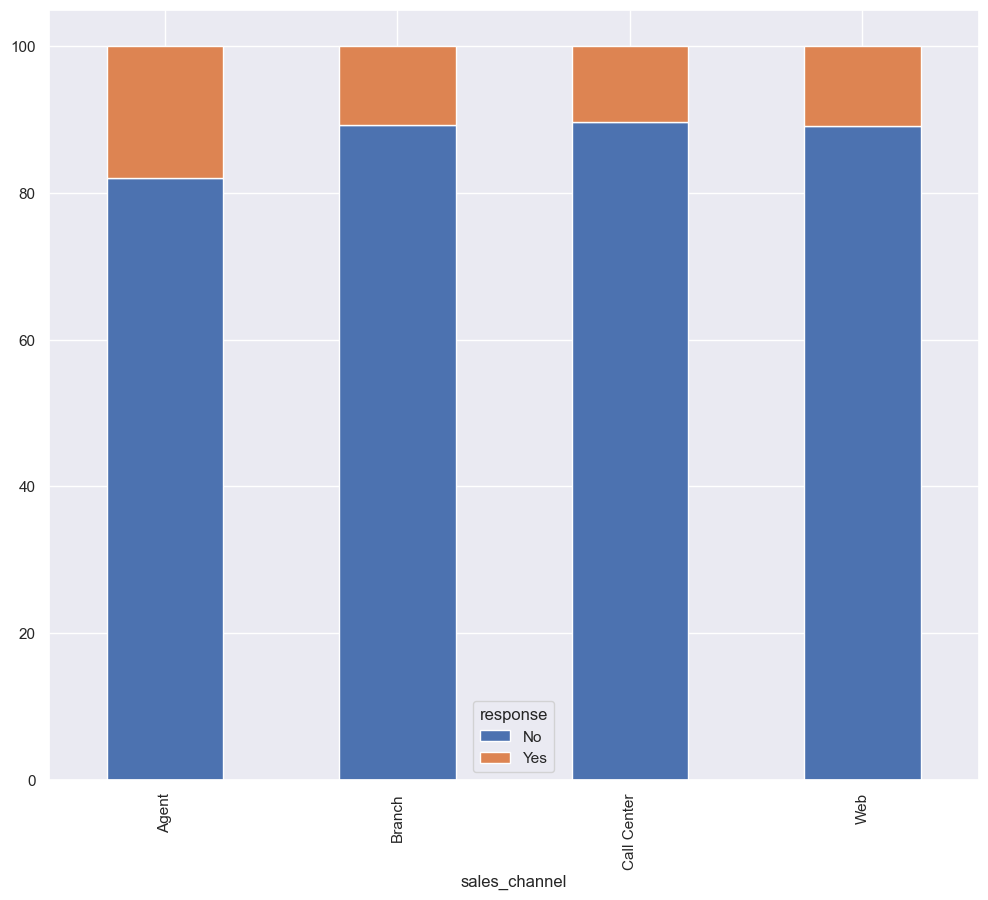

In [101]:
response_rates = df.groupby('sales_channel')['response'].value_counts(normalize=True).unstack()* 100
response_rates.plot(kind='bar', stacked=True, figsize=(12, 10))
plt.show()

In [ ]:
#Show a plot of the response rate by the total claim amount

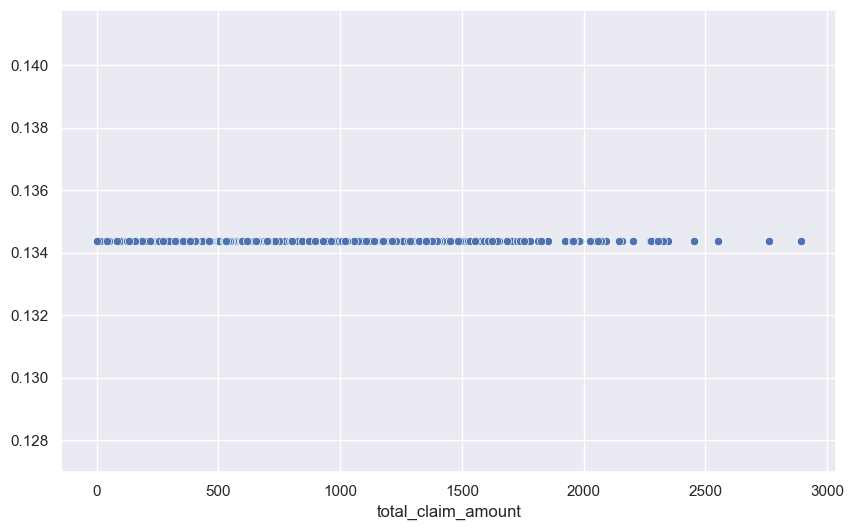

In [103]:
response_rate = df['response'].value_counts(normalize=True)['Yes']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_claim_amount', y=response_rate, data=df)

plt.show()

In [ ]:
#Show a plot of the response rate by income

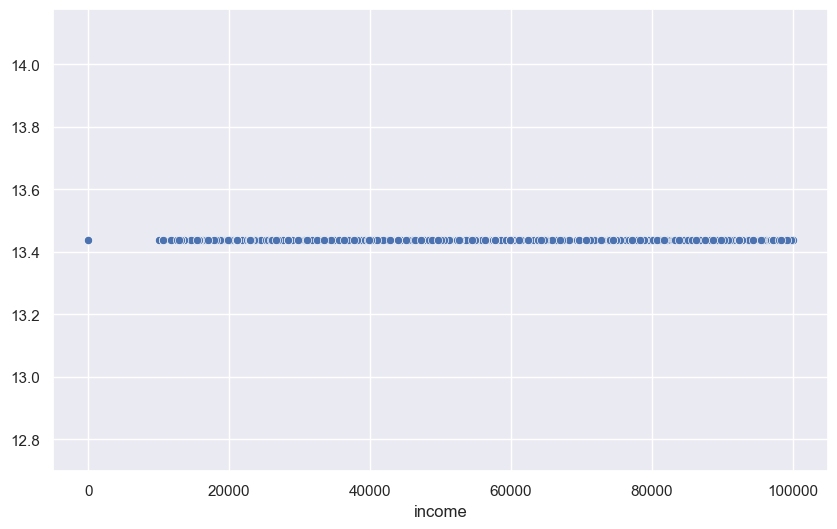

In [97]:
response_rate = df['response'].value_counts(normalize=True)['Yes']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y=response_rate, data=df)

plt.show()